In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

/Users/clementinemirande/Desktop/M2/M2DENG/dev_web_interface_ia/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [3]:
train = pd.read_csv('data/train.csv')
valid = pd.read_csv('data/valid.csv')
test = pd.read_csv('data/test.csv')

In [4]:
x_train, y_train = train['review'], train['polarity']
x_valid, y_valid = valid['review'], valid['polarity']
x_test, y_test = test['review'], test['polarity']

In [5]:
token = tokenizer.encode(x_train[0], return_tensors='pt')

In [6]:
results = model(token)
results

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.4579,  1.2332,  0.4029, -0.3338, -1.4598]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [7]:
tokens = tokenizer(x_test.iloc[:100].tolist(), return_tensors='pt', padding=True, truncation=True, max_length=512)

In [8]:
tokens

{'input_ids': tensor([[  101, 18115, 10275,  ...,     0,     0,     0],
        [  101, 10149,   156,  ...,     0,     0,     0],
        [  101, 10119, 47909,  ...,     0,     0,     0],
        ...,
        [  101, 52197,   119,  ...,     0,     0,     0],
        [  101, 10130, 11291,  ...,     0,     0,     0],
        [  101, 10646,   120,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [9]:
results = model(**tokens)

In [10]:
results

SequenceClassifierOutput(loss=None, logits=tensor([[-3.1408, -3.0430, -0.5353,  2.1683,  3.6031],
        [-0.8757,  4.6047,  1.3214, -2.0374, -2.3839],
        [-2.2569, -1.6205,  0.2924,  1.3981,  1.6413],
        [ 0.2213,  2.1934,  1.8643, -0.7695, -2.6861],
        [ 2.8219,  2.6977,  0.8728, -2.0433, -3.3974],
        [-2.7026, -0.9195,  0.8891,  1.4217,  1.0583],
        [-2.9112, -1.1686,  2.0767,  2.0348,  0.0557],
        [-0.9851, -1.3573, -1.1249,  0.4689,  2.2867],
        [-3.5273, -2.8079,  0.4259,  2.6865,  2.5788],
        [ 1.3458,  2.5641,  1.3516, -1.1912, -3.3469],
        [-3.8272, -1.5376,  2.2057,  2.7297,  0.2701],
        [-3.2139, -2.8003, -1.1336,  2.0234,  4.0730],
        [-1.8587,  0.8932,  1.8174,  0.5117, -1.1476],
        [-3.3270, -2.4003,  0.7931,  2.2695,  2.3007],
        [ 0.6857,  0.9501,  0.3977, -0.8220, -0.9843],
        [ 3.9449,  2.8433, -0.0156, -2.5272, -3.2834],
        [-3.3171, -2.0177,  1.3597,  2.3301,  1.4299],
        [-1.6109, -0.7

In [13]:
best = torch.topk(results.logits, k=2, dim=1).indices

In [14]:
avis = [val[1] if val[0] == 2 else val[0] for val in best]

In [15]:
avis_bi = [0 if i in [0, 1] else 1 for i in avis]

<Axes: >

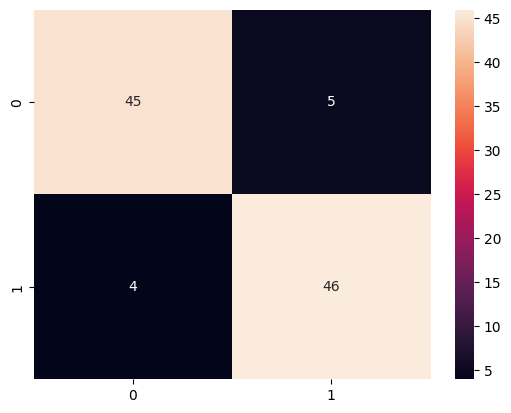

In [16]:
sns.heatmap(confusion_matrix(avis_bi, y_test.iloc[:100]), annot=True)

In [17]:
compare = pd.DataFrame({'pred': avis_bi, 'true': y_test.iloc[:100]})

In [18]:
compare

,pred,true
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
95,1,0
96,1,1
97,0,0
98,1,1


In [20]:
count = 0
for i in compare.index:
    if compare['pred'][i] == compare['true'][i]:
        count += 1

In [21]:
count

91

In [22]:
x_test[17]

'Starship Troopers continue sa descente aux enfers, ce troisième épisode nous livre une histoire complètement tordue et surtout des effets spéciaux qui frôlent le nanar.'

In [24]:
token = tokenizer.encode(x_test[17], return_tensors='pt')
results = model(token)
results

SequenceClassifierOutput(loss=None, logits=tensor([[-1.6109, -0.7903,  0.0144,  0.7123,  1.0793]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
essai = "Starship Troopers continue sa descente aux enfers, ce troisième épisode nous livre une histoire complètement tordue"
token = tokenizer.encode(essai, return_tensors='pt')
results = model(token)
results

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.5294,  0.1691, -0.3994, -0.6874,  0.2138]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [29]:
tokenizer2 = AutoTokenizer.from_pretrained("dbmdz/bert-base-french-europeana-cased")
model2 = AutoModelForSequenceClassification.from_pretrained("dbmdz/bert-base-french-europeana-cased")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-french-europeana-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
token = tokenizer2.encode(x_test[17], return_tensors='pt')
results = model2(token)
results

SequenceClassifierOutput(loss=None, logits=tensor([[-0.0326,  0.0437]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)